Topic:        **Benson Challenges** <br>
Subject:      Explore MTA turnstile data <br>
Date:         07/02/2019 <br>
Name:         Katherine Bell <br>


<h4>Section 1: Pandas<h4>

**C/A** – The Control Area is the operator booth in a station. Some stations only have one operator booth. However, larger stations may have more than one. <br /> <br /> 
**UNIT** – The Remote Unit, which is the collection of turnstiles. A station may have more than one Remote Unit.<br /> <br /> 
**STATION** -- Station name <br /> <br /> 
**SCP**– The Subunit Channel Position represents the turnstile and the number used may repeat across stations. The **UNIT** and **SCP** together is a unique identifier of a turnstile.<br /> <br /> 
**DATE** – The Date is the date of the recording with the format MM/DD/YYYY.<br /> <br /> 
**TIME** – The Time is the time for a recording, with the format: HH:MM:SS.<br /> <br /> 
**DESC** – The DESC is the type of event of the reading. The turnstiles submit “Regular” readings every four hours. They stagger the exact time of the readings across all the turnstiles and stations. Staggering the data submission times avoids having all the turnstiles update at simultaneously. “Recover Audit” designates scheduled readings taken after a communication outage. Our analysis uses “Regular” and “Recover Audit” readings. We discard other values such as “DoorClose” and “DoorOpen” which represent unscheduled maintenance readings. <br /> <br /> 
**ENTRIES** - The **ENTRIES** are a cumulative count of turnstile entrances. Note, the **ENTRIES** do not reset each day or for each recording period. The turnstile entry count continues to increase until it reaches the device limit and then resets to zero.<br /><br />
**EXITS** - The **EXITS** are a cumulative count of the turnstile exits.

[A very useful article for MTA Turnstile analysis.](http://transitdatatoolkit.com/lessons/subway-turnstile-data/)


In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt


In [73]:
# - challenge 1

# - load data
url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt'
df = pd.read_csv(url, header = 0, sep=',')
df.head()



,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581


In [74]:
# - clean column names
# - make headers lowercase
df.columns = df.columns.str.strip().str.lower() 


In [107]:
sort_on_turnstiles = df.set_index(['c/a','unit','scp','station']).sort_index()
sort_on_turnstiles

linename division       date  \
c/a   unit scp      station                                      
A002  R051 02-00-00 59 ST          NQR456W      BMT 2019-06-22   
                    59 ST          NQR456W      BMT 2019-06-22   
                    59 ST          NQR456W      BMT 2019-06-22   
                    59 ST          NQR456W      BMT 2019-06-22   
                    59 ST          NQR456W      BMT 2019-06-22   
                    59 ST          NQR456W      BMT 2019-06-22   
                    59 ST          NQR456W      BMT 2019-06-23   
                    59 ST          NQR456W      BMT 2019-06-23   
                    59 ST          NQR456W      BMT 2019-06-23   
                    59 ST          NQR456W      BMT 2019-06-23   
                    59 ST          NQR456W      BMT 2019-06-23   
                    59 ST          NQR456W      BMT 2019-06-23   
                    59 ST          NQR456W      BMT 2019-06-24   
                    59 ST          NQR456W      BMT 2019-06-24   
                    59 ST          NQR456W      BMT 2019-06-24   
                    59 ST          NQR456W      BMT 2019-06-24   
                    59 ST          NQR456W      BMT 2019-06-24   
                    59 ST          NQR456W      BMT 2019-06-24   
                    59 ST          NQR456W      BMT 2019-06-25   
                    59 ST          NQR456W      BMT 2019-06-25   
                    59 ST          NQR456W      BMT 2019-06-25   
                    59 ST          NQR456W      BMT 2019-06-25   
                    59 ST          NQR456W      BMT 2019-06-25   
                    59 ST          NQR456W      BMT 2019-06-25   
                    59 ST          NQR456W      BMT 2019-06-26   
                    59 ST          NQR456W      BMT 2019-06-26   
                    59 ST          NQR456W      BMT 2019-06-26   
                    59 ST          NQR456W      BMT 2019-06-26   
                    59 ST          NQR456W      BMT 2019-06-26   
                    59 ST          NQR456W      BMT 2019-06-26   
...                                    ...      ...        ...   
TRAM2 R469 00-05-01 RIT-ROOSEVELT        R      RIT 2019-06-24   
                    RIT-ROOSEVELT        R      RIT 2019-06-24   
                    RIT-ROOSEVELT        R      RIT 2019-06-24   
                    RIT-ROOSEVELT        R      RIT 2019-06-24   
                    RIT-ROOSEVELT        R      RIT 2019-06-24   
                    RIT-ROOSEVELT        R      RIT 2019-06-24   
                    RIT-ROOSEVELT        R      RIT 2019-06-25   
                    RIT-ROOSEVELT        R      RIT 2019-06-25   
                    RIT-ROOSEVELT        R      RIT 2019-06-25   
                    RIT-ROOSEVELT        R      RIT 2019-06-25   
                    RIT-ROOSEVELT        R      RIT 2019-06-25   
                    RIT-ROOSEVELT        R      RIT 2019-06-25   
                    RIT-ROOSEVELT        R      RIT 2019-06-26   
                    RIT-ROOSEVELT        R      RIT 2019-06-26   
                    RIT-ROOSEVELT        R      RIT 2019-06-26   
                    RIT-ROOSEVELT        R      RIT 2019-06-26   
                    RIT-ROOSEVELT        R      RIT 2019-06-26   
                    RIT-ROOSEVELT        R      RIT 2019-06-26   
                    RIT-ROOSEVELT        R      RIT 2019-06-27   
                    RIT-ROOSEVELT        R      RIT 2019-06-27   
                    RIT-ROOSEVELT        R      RIT 2019-06-27   
                    RIT-ROOSEVELT        R      RIT 2019-06-27   
                    RIT-ROOSEVELT        R      RIT 2019-06-27   
                    RIT-ROOSEVELT        R      RIT 2019-06-27   
                    RIT-ROOSEVELT        R      RIT 2019-06-28   
                    RIT-ROOSEVELT        R      RIT 2019-06-28   
                    RIT-ROOSEVELT        R      RIT 2019-06-28   
                    RIT-ROOSEVELT        R      RIT 2019-06-28   
        

In [94]:
# - challenge 2 

import datetime

# # - combine and convert time and date 
# - datetime has to convert a string-type
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))
df['time'] = pd.to_datetime(df['time'].astype(str))
df['date'] = pd.to_datetime(df['date'].astype(str))



In [ ]:
# - challenge 3

# - what is n (in hours)?
n = 4

In [125]:
# - total number of passengers in a day PER TURNSTILE

# - total number of turnstile entrances 
# - difference between entrances from beginning to end of day
turnstile_entries_group_date = df.groupby(['date','c/a','unit','scp','station']
                                         )['entries'].apply(lambda x: x.max() - x.min()
                                                           ).reset_index()
turnstile_entries_group_date.dtypes


# - total entries by date
# turnstile_entries_group_date.groupby('date')['entries'].sum().reset_index()


date       datetime64[ns]
c/a                object
unit               object
scp                object
station            object
entries             int64
dtype: object

In [164]:
# - challenge 4

# - create a turnstile mask
# - choose your own adventure

turnstile_mask = (turnstile_entries_group_date['scp'] == '02-00-01'
                         ) &(turnstile_entries_group_date['station'] == '59 ST')

# - apply mask  
turnstile_entries_mask = turnstile_entries_group_date[turnstile_mask]

# - make var for plotting
turnstile_entries_plot = turnstile_entries_mask.drop(['c/a', 'unit', 'scp','station'], axis = 1)
turnstile_entries_plot



,date,entries
1,2019-06-22,586
4875,2019-06-23,435
9748,2019-06-24,1064
14620,2019-06-25,1100
19491,2019-06-26,1095
24365,2019-06-27,1117
29239,2019-06-28,1077


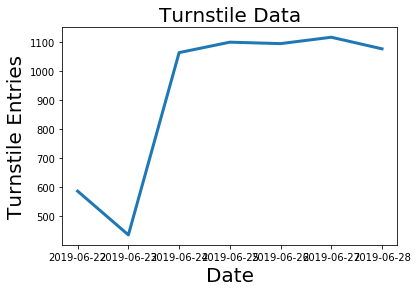

<Figure size 720x360 with 0 Axes>

In [165]:
import matplotlib.pyplot as plt

# - matplotlib weridness requires to change datatype
plt.plot(turnstile_entries_plot.date.astype('O')
         , turnstile_entries_plot.entries, linewidth = 3)
plt.title("Turnstile Data", family = 'monotype', fontsize = 20)
plt.xlabel("Date", family = 'monotype', fontsize = 20)
plt.ylabel("Turnstile Entries", family = 'monotype', fontsize = 20)
plt.figure(figsize = [10,5]);

# - you can see that this is more of a weekday heavy turnstile

# - question for TAs - how to fix dates - 
# - https://matplotlib.org/3.1.0/gallery/recipes/common_date_problems.html

In [172]:
# REDO!! - challenge 5

# - group by turnstile


# - group by c/a, unit, station


# - select what station you want to look at
station_mask = (station_entries_group_date['station'] == '59 ST')

# - apply mask  
station_entries_mask = station_entries_group_date[station_mask]


In [49]:
# - challenge 6

# - combine everything in each station date, station


station
52 ST              867864281
SPRING ST          117552854
8 AV                56652954
BAY PKWY             5420108
BURNSIDE AV          2073991
34 ST-PENN STA       1036623
GRD CNTRL-42 ST       895143
34 ST-HERALD SQ       773782
23 ST                 688901
42 ST-PORT AUTH       655683
TIMES SQ-42 ST        635934
14 ST-UNION SQ        611732
FULTON ST             587469
86 ST                 501435
CANAL ST              501312
125 ST                480523
59 ST COLUMBUS        437527
96 ST                 424288
59 ST                 392509
14 ST                 389881
WALL ST               360397
FLUSHING-MAIN         358499
PATH NEW WTC          354657
47-50 STS ROCK        353581
CHAMBERS ST           337129
JKSN HT-ROOSVLT       313644
50 ST                 311576
W 4 ST-WASH SQ        285258
72 ST                 278039
28 ST                 277259
                     ...    
JUNIUS ST              13368
ALABAMA AV             13014
BEACH 60 ST            13007
55 ST 

In [70]:
turnstile_exit_group = df.groupby(['c/a','unit','scp','station'])['exits'].apply(lambda x: x.max() - x.min()).reset_index()
station_exit_group = turnstile_exit_group.groupby('station')['exits'].sum().sort_values(0,False)
station_exit_group

station
WEST FARMS SQ      335554231
52 ST              174353987
8 AV                20064420
BAY PKWY             6037575
BURNSIDE AV          1233501
34 ST-PENN STA        930865
GRD CNTRL-42 ST       835108
34 ST-HERALD SQ       715575
TIMES SQ-42 ST        610134
14 ST-UNION SQ        558180
42 ST-PORT AUTH       524465
23 ST                 513247
FULTON ST             510789
86 ST                 441898
CANAL ST              401245
125 ST                390548
47-50 STS ROCK        377741
59 ST COLUMBUS        374838
96 ST                 357874
59 ST                 346770
14 ST                 331138
PATH NEW WTC          325901
FLUSHING-MAIN         298559
CHAMBERS ST           291529
WALL ST               279656
72 ST                 277648
W 4 ST-WASH SQ        262117
42 ST-BRYANT PK       261400
LEXINGTON AV/53       259049
ATL AV-BARCLAY        258989
                     ...    
231 ST                  6800
BEACH 36 ST             6772
E 143/ST MARY'S         6702
BRONX 

In [ ]:
station_min_max = df.groupby(['c/a','unit','scp','station'])['exits'])